In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error



In [25]:
df = pd.read_csv("Housing.csv")
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [11]:
df.shape


(545, 14)

In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   price                            545 non-null    int64 
 1   area                             545 non-null    int64 
 2   bedrooms                         545 non-null    int64 
 3   bathrooms                        545 non-null    int64 
 4   stories                          545 non-null    int64 
 5   mainroad                         545 non-null    object
 6   guestroom                        545 non-null    object
 7   basement                         545 non-null    object
 8   hotwaterheating                  545 non-null    object
 9   airconditioning                  545 non-null    object
 10  parking                          545 non-null    int64 
 11  prefarea                         545 non-null    object
 12  furnishingstatus_semi-furnished  545

In [13]:
df.isnull().sum()


,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [32]:
binary_cols = [
    'mainroad', 'guestroom', 'basement',
    'hotwaterheating', 'airconditioning',
    'prefarea'
]

for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].map({'yes': 1, 'no': 0})


In [48]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [49]:
'furnishing_status' in df.columns


False

In [50]:
for col in df.columns:
    print(col)


price
area
bedrooms
bathrooms
stories
mainroad
guestroom
basement
hotwaterheating
airconditioning
parking
prefarea
furnishingstatus_semi-furnished_true
furnishingstatus_unfurnished_true


In [51]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)


In [52]:
df.columns


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_semi-furnished_true',
       'furnishingstatus_unfurnished_true'],
      dtype='object')

In [53]:
df.columns = df.columns.str.replace('_true', '')


In [54]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   mainroad                         545 non-null    int64
 6   guestroom                        545 non-null    int64
 7   basement                         545 non-null    int64
 8   hotwaterheating                  545 non-null    int64
 9   airconditioning                  545 non-null    int64
 10  parking                          545 non-null    int64
 11  prefarea                         545 non-null    int64
 12  furnishingstatus_semi-furnished  545 non-null    b

In [55]:
X = df.drop('price', axis=1)
y = df['price']


In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [57]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [59]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("RMSE:", rmse)
print("R2 Score:", r2_score(y_test, y_pred))


RMSE: 1324506.9600914384
R2 Score: 0.6529242642153185


In [60]:
y_pred = model.predict(X_test)


In [61]:
mae = mean_absolute_error(y_test, y_pred)
mae


970043.4039201637

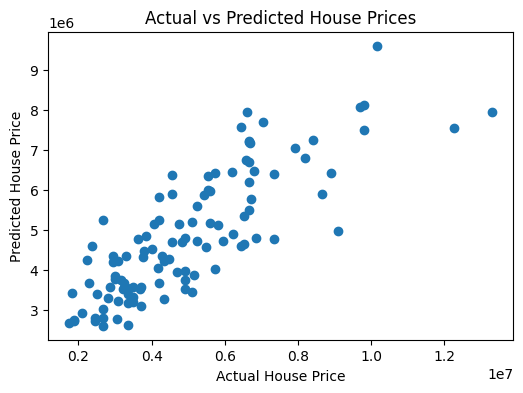

In [62]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


Insights


*   House area and number of bathrooms strongly influence price
*  Properties with air conditioning and preferred area tend to be priced higher

*   Linear Regression provides a reasonable baseline model
